# Introducing Keras 

[`keras`](https://keras.io/) is a library designed to simplify the access to deep learning functionality of TensorFlow (and Theano, but we will not touch on that at all).

We will use a few functions from [`scikit-learn`](http://scikit-learn.org) to generate data sets:

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from utils import generate_dataset

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

We'll also set up some configuration variables up-front:

In [3]:
# Configuration variables:
num_labels = 2    # The number of labels.
NUM_EPOCHS = 5
NUM_HIDDEN = 5
BATCH_SIZE = 100  # The number of training examples to use per training step.
n_train = 1000
n_test = 200

### The first example is a linearly separable data-set:

In [4]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_blobs, 
                                                                    n_train=1000, 
                                                                    n_test=200, 
                                                                    num_labels=2,
                                                                    centers=2, 
                                                                    center_box=[-4., 4.])

In [5]:
train_data

array([[-4.6919293 , -1.8122023 ],
       [-5.7411394 , -2.5331864 ],
       [-0.13505024,  1.1485114 ],
       ...,
       [-1.2949648 ,  1.2757167 ],
       [-4.5698576 , -0.5710374 ],
       [-2.0422447 ,  0.41359636]], dtype=float32)

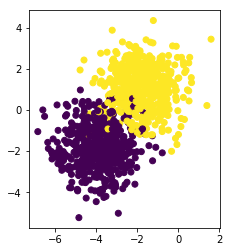

In [6]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.set_aspect('equal')

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

/Users/arokem/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
model.fit(train_data, train_labels, epochs=10, batch_size=BATCH_SIZE)

Epoch 1/10
1000/1000 [==============================] - 0s 275us/step - loss: 0.1749 - acc: 0.6830
Epoch 2/10
1000/1000 [==============================] - 0s 82us/step - loss: 0.1683 - acc: 0.7000
Epoch 3/10
1000/1000 [==============================] - 0s 35us/step - loss: 0.1633 - acc: 0.7060
Epoch 4/10
1000/1000 [==============================] - 0s 43us/step - loss: 0.1587 - acc: 0.7200
Epoch 5/10
1000/1000 [==============================] - 0s 52us/step - loss: 0.1542 - acc: 0.7260
Epoch 6/10
1000/1000 [==============================] - 0s 67us/step - loss: 0.1499 - acc: 0.7380
Epoch 7/10
1000/1000 [==============================] - 0s 32us/step - loss: 0.1458 - acc: 0.7460
Epoch 8/10
1000/1000 [==============================] - 0s 20us/step - loss: 0.1420 - acc: 0.7560
Epoch 9/10
1000/1000 [==============================] - 0s 27us/step - loss: 0.1383 - acc: 0.7650
Epoch 10/10
1000/1000 [==============================] - 0s 31us/step - loss: 0.1346 - acc: 0.7830


In [10]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)

200/200 [==============================] - 0s 159us/step


In [11]:
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

loss : 0.13079912215471268
acc : 0.800000011920929


In [12]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

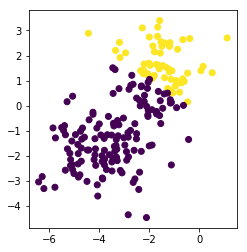

In [13]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=prediction)
ax.set_aspect('equal')



### The next set of data is not linearly separable:

In [14]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_moons, 
                                                                    n_train=1000, 
                                                                    n_test=200,
                                                                    num_labels=2, 
                                                                    noise=0.2)

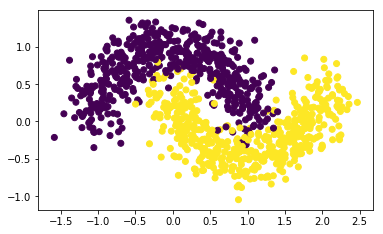

In [16]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.set_aspect('equal')

In [17]:
model.fit(train_data, train_labels, nb_epoch=10, batch_size=BATCH_SIZE)

Epoch 1/10
1000/1000 [==============================] - 0s 22us/step - loss: 0.2782 - acc: 0.5450
Epoch 2/10
1000/1000 [==============================] - 0s 17us/step - loss: 0.2759 - acc: 0.5470
Epoch 3/10
1000/1000 [==============================] - 0s 23us/step - loss: 0.2736 - acc: 0.5500
Epoch 4/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.2713 - acc: 0.5520
Epoch 5/10
 700/1000 [====================>.........] - ETA: 0s - loss: 0.2660 - acc: 0.5643

/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


1000/1000 [==============================] - 0s 91us/step - loss: 0.2691 - acc: 0.5490
Epoch 6/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.2669 - acc: 0.5480
Epoch 7/10
1000/1000 [==============================] - 0s 21us/step - loss: 0.2648 - acc: 0.5520
Epoch 8/10
1000/1000 [==============================] - 0s 31us/step - loss: 0.2627 - acc: 0.5530
Epoch 9/10
1000/1000 [==============================] - 0s 35us/step - loss: 0.2607 - acc: 0.5550
Epoch 10/10
1000/1000 [==============================] - ETA: 0s - loss: 0.2531 - acc: 0.600 - 0s 29us/step - loss: 0.2588 - acc: 0.5560


In [18]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 29us/step

loss : 0.2606065720319748
acc : 0.5449999868869781


In [21]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

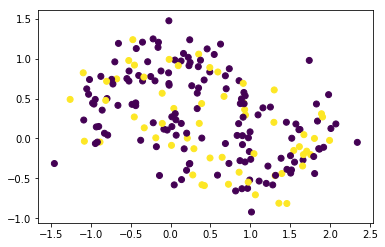

In [21]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=prediction)
ax.set_aspect('equal')

In [22]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_circles, 
                                                                    n_train=1000,
                                                                    n_test=200, 
                                                                    noise=0.2, 
                                                                    num_labels=2,
                                                                    factor=0.1)

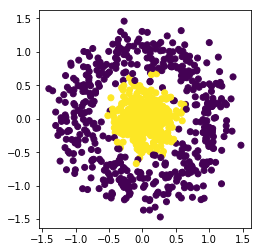

In [23]:
fig, ax = plt.subplots(1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.set_aspect('equal')

In [24]:
model.fit(train_data, train_labels, nb_epoch=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
1000/1000 [==============================] - 0s 20us/step - loss: 0.2567 - acc: 0.5640
Epoch 2/5
1000/1000 [==============================] - 0s 18us/step - loss: 0.2565 - acc: 0.5660
Epoch 3/5
1000/1000 [==============================] - 0s 22us/step - loss: 0.2563 - acc: 0.5760
Epoch 4/5
1000/1000 [==============================] - 0s 34us/step - loss: 0.2561 - acc: 0.5710
Epoch 5/5
1000/1000 [==============================] - 0s 42us/step - loss: 0.2558 - acc: 0.5820


/Users/arokem/anaconda3/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [25]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

200/200 [==============================] - 0s 26us/step

loss : 0.25068309903144836
acc : 0.5900000035762787


In [26]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

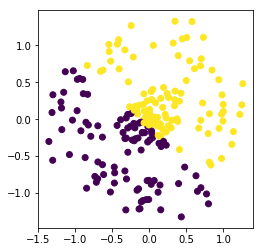

In [27]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=prediction)
ax.set_aspect('equal')

In [28]:
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model.fit(train_data, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Epoch 1/5
1000/1000 [==============================] - 1s 510us/step - loss: 0.6183 - acc: 0.5720
Epoch 2/5
1000/1000 [==============================] - 0s 38us/step - loss: 0.5858 - acc: 0.6740
Epoch 3/5
1000/1000 [==============================] - 0s 43us/step - loss: 0.5431 - acc: 0.7400
Epoch 4/5
1000/1000 [==============================] - 0s 47us/step - loss: 0.5100 - acc: 0.7860
Epoch 5/5
1000/1000 [==============================] - 0s 62us/step - loss: 0.4793 - acc: 0.8410

200/200 [==============================] - 0s 444us/step

loss : 0.4113183468580246
acc : 0.8599999845027924


In [30]:
prediction = np.round(model.predict(test_data)).astype(int).squeeze()

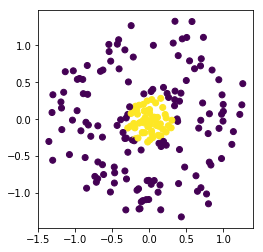

In [31]:
fig, ax = plt.subplots(1)
ax.scatter(test_data[:, 0], test_data[:, 1], c=prediction)
ax.set_aspect('equal')